In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import glob as gb
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import keras

In [53]:
trainpath = '/kaggle/input/seat-belt2/Seat_Belt2/'
testpath  = '/kaggle/input/seat-belt2/Seat_Belt2/'

In [54]:
for folder in  os.listdir(trainpath + 'Train') : 
    files = gb.glob(pathname= str( trainpath +'Train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 3700 in folder Seat_Belt
For training data , found 3317 in folder WithoutSeat_Belt


In [55]:
for folder in  os.listdir(trainpath + 'Test') : 
    files = gb.glob(pathname= str( trainpath +'Test//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 800 in folder Seat_Belt
For training data , found 669 in folder WithoutSeat_Belt


In [56]:
files = gb.glob(pathname= str(predpath +'//' + '/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 503


In [58]:
code = {'Seat_Belt':0 ,'WithoutSeat_Belt':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [59]:
size = []
for folder in  os.listdir(trainpath +'Train') : 
    files = gb.glob(pathname= str( trainpath +'Train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(480, 640, 3)      3988
(1080, 1920, 3)     941
(408, 612, 3)       837
(464, 848, 3)       670
(1101, 1500, 3)      57
                   ... 
(945, 1500, 3)        1
(380, 612, 3)         1
(420, 612, 3)         1
(1086, 1500, 3)       1
(1185, 1500, 3)       1
Length: 106, dtype: int64

In [60]:
size = []
for folder in  os.listdir(trainpath +'Test') : 
    files = gb.glob(pathname= str( trainpath +'Test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(480, 640, 3)      800
(1080, 1920, 3)    266
(464, 848, 3)      189
(408, 612, 3)      112
(416, 416, 3)       53
(405, 612, 3)       11
(315, 474, 3)        6
(240, 360, 3)        5
(407, 612, 3)        5
(612, 410, 3)        4
(459, 612, 3)        4
(285, 390, 3)        4
(612, 438, 3)        3
(410, 612, 3)        3
(380, 612, 3)        2
(342, 474, 3)        1
(348, 474, 3)        1
dtype: int64

In [62]:
Size = 100

In [63]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'Train') : 
    files = gb.glob(pathname= str( trainpath +'Train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (Size ,Size))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [64]:
print(f'we have {len(X_train)} items in X_train')

we have 7017 items in X_train


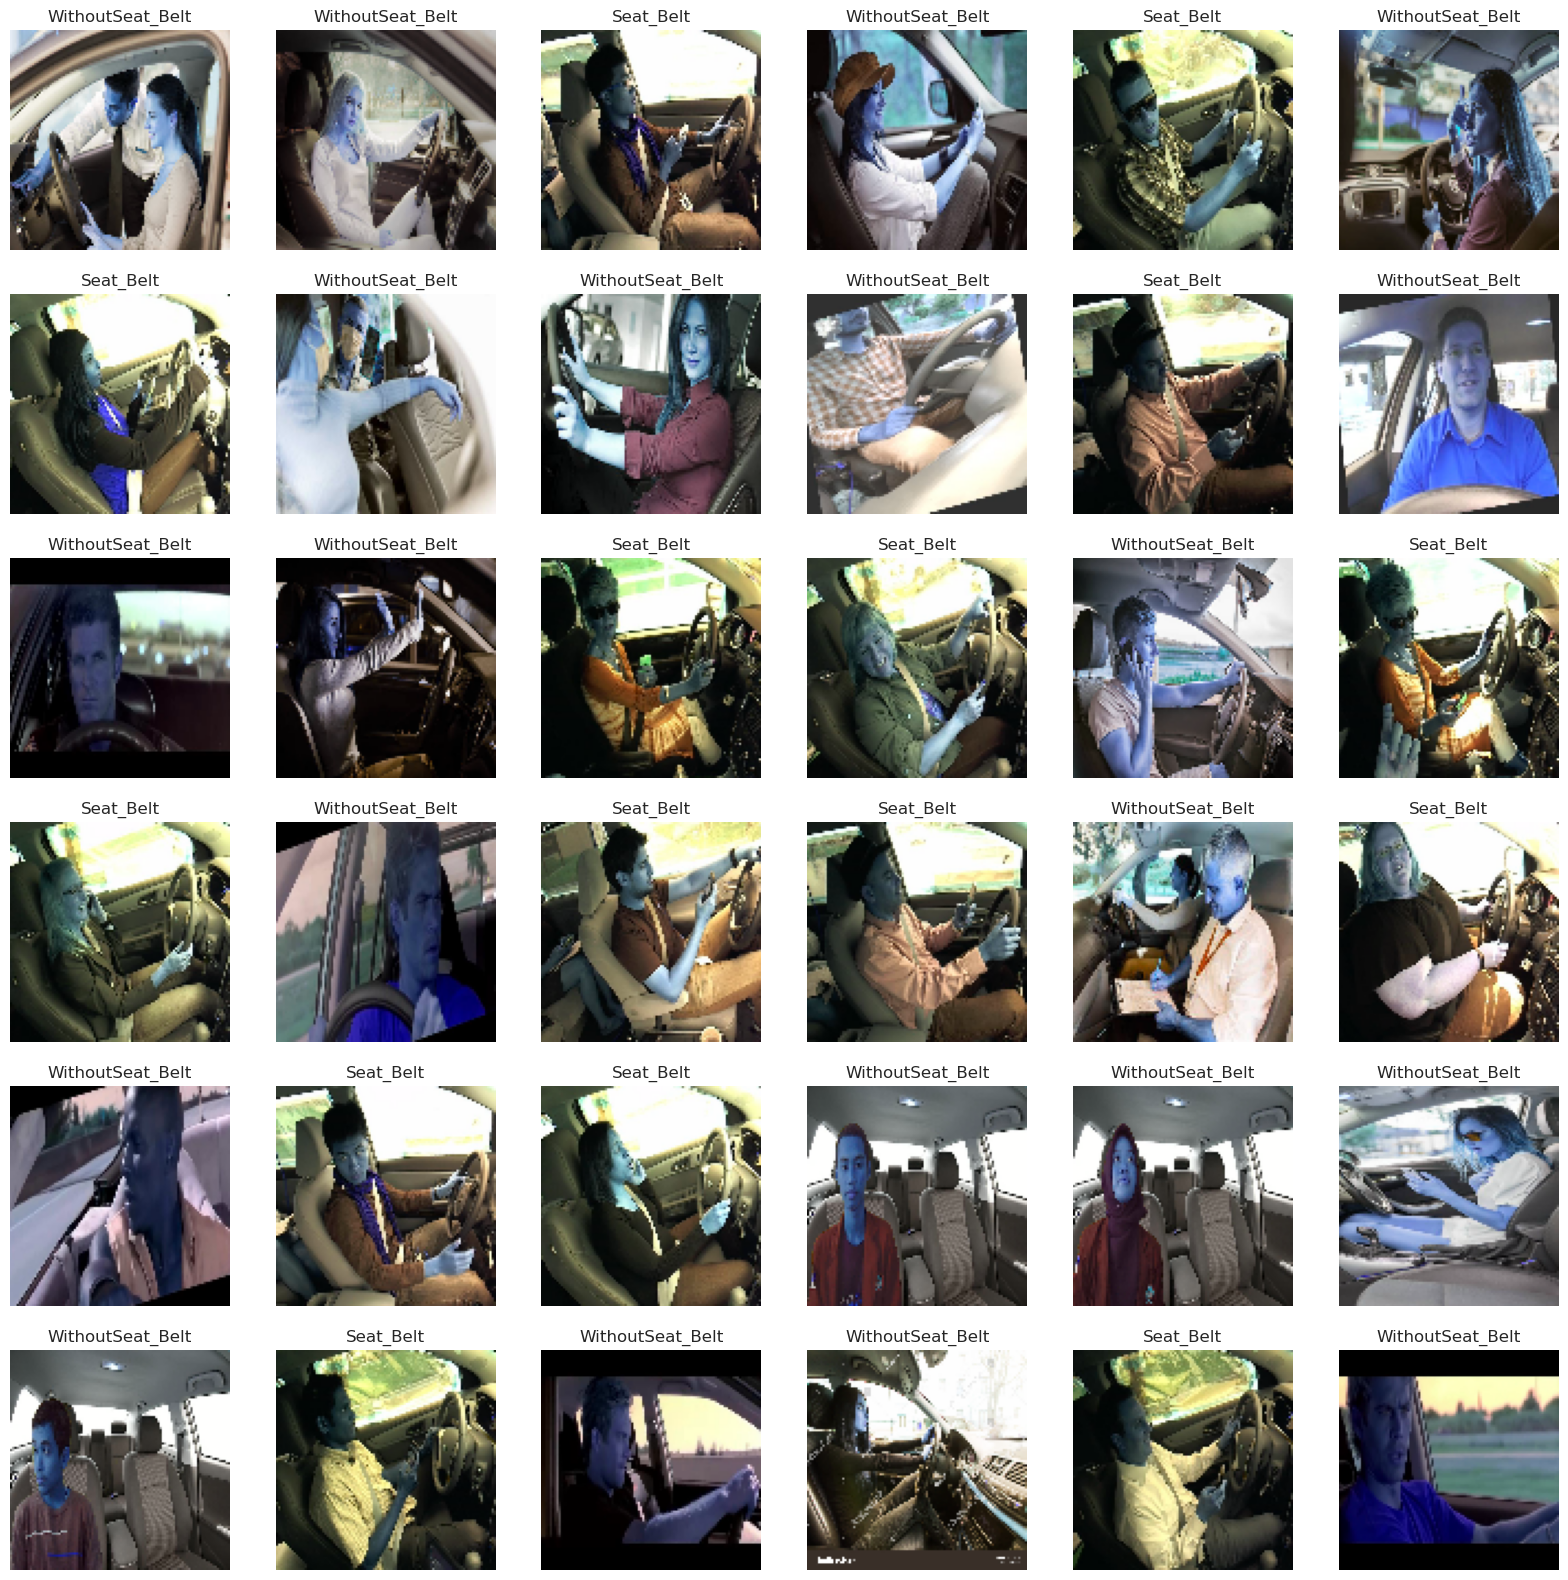

In [65]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [66]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'Test') : 
    files = gb.glob(pathname= str(testpath + 'Test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (Size,Size))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [67]:
print(f'we have {len(X_test)} items in X_test')

we have 1469 items in X_test


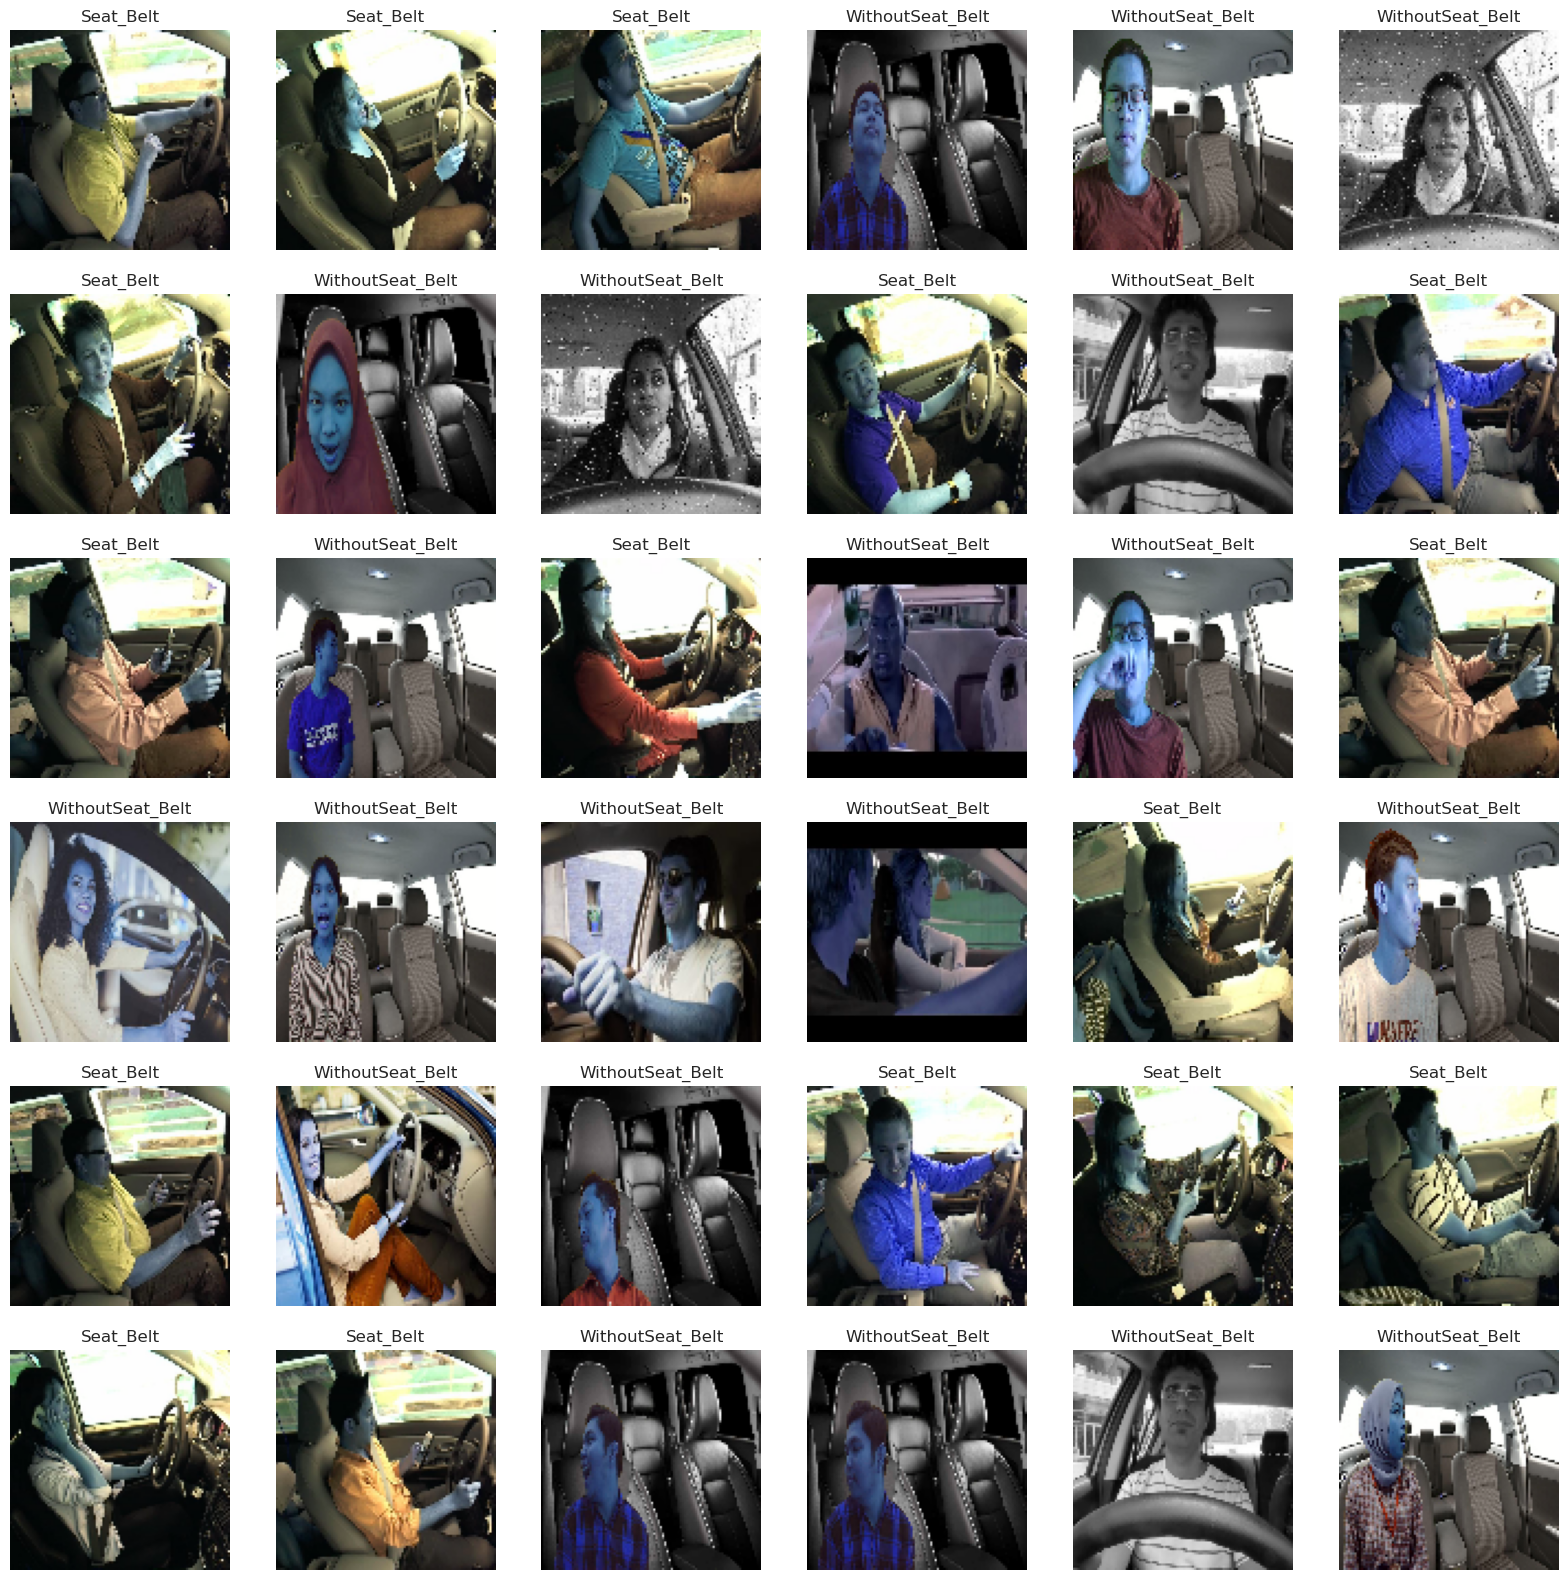

In [68]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [72]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (7017, 100, 100, 3)
X_test shape  is (1469, 100, 100, 3)
X_pred shape  is (503, 100, 100, 3)
y_train shape  is (7017,)
y_test shape  is (1469,)


In [73]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(Size,Size,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 98, 98, 200)       5600      
                                                                 
 conv2d_15 (Conv2D)          (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 150)      0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 120)       162120    
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 80)        86480     
                                                                 
 conv2d_18 (Conv2D)          (None, 18, 18, 50)        36050     
                                 

In [74]:
epochs = 5
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/5
110/110 [==============================] - 1164s 11s/step - loss: 0.8606 - accuracy: 0.8589
Epoch 2/5
110/110 [==============================] - 1146s 10s/step - loss: 0.0702 - accuracy: 0.9775
Epoch 3/5
110/110 [==============================] - 1141s 10s/step - loss: 0.0566 - accuracy: 0.9813
Epoch 4/5
110/110 [==============================] - 1142s 10s/step - loss: 0.0276 - accuracy: 0.9887
Epoch 5/5
110/110 [==============================] - 1159s 11s/step - loss: 0.0377 - accuracy: 0.9880


In [75]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

46/46 [==============================] - 69s 1s/step - loss: 0.6639 - accuracy: 0.9687
Test Loss is 0.6638621687889099
Test Accuracy is 0.9686861634254456


In [86]:
from tensorflow.keras.models import load_model
model.save("Seat_belt_model.h5")